In [2]:
import os
import argparse
import shutil

import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [4]:
num_threads = 6

benchmark = pd.read_csv("omp.csv")


In [5]:
num_lines = len(benchmark["name"]);
num_tests = int(num_lines / num_threads)


    threads  acceleration      Name
0         1      1.000000  TaskOmp2
1         2      1.996300  TaskOmp2
2         3      2.923630  TaskOmp2
3         4      3.653077  TaskOmp2
4         5      4.536334  TaskOmp2
5         6      4.777283  TaskOmp2
6         1      1.000000  TaskOmp0
7         2      1.940764  TaskOmp0
8         3      2.985065  TaskOmp0
9         4      3.907291  TaskOmp0
10        5      4.640696  TaskOmp0
11        6      4.762727  TaskOmp0


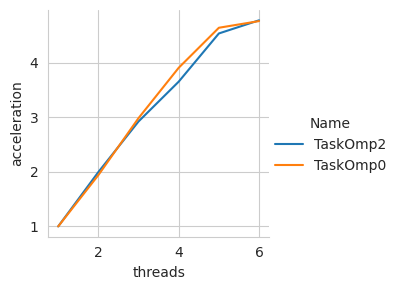

In [6]:
titles = []

x = []
y = []
hue = []
size = []

for i in range(num_tests):

    name = benchmark["name"][i * num_threads].split("/")

    titles.append(name[0])

    y_max = benchmark["real_time"][i * num_threads + 0]

    for j in range(num_threads):
        y.append(benchmark["real_time"][(i * num_threads + j) + 0])

        y[-1] = y_max / y[-1]

        hue.append(titles[-1])

        x.append(j + 1)

data = list(zip(x, y, hue))
dataFrame = pd.DataFrame(data, columns=["threads", "acceleration", "Name"])

print(dataFrame)

sns.set_style("whitegrid")
g = sns.FacetGrid(data=dataFrame, hue="Name")
g.map(sns.lineplot, "threads", "acceleration")
g.add_legend()


/home/panterrich/Documents/ParallelProgramming/tasks/omp_lab_1
mpirun -np 1 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 1 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 1 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 1 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 2 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 2 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 2 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 2 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 3 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 3 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 3 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 3 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 4 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 4 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 4 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 4 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 5 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 5 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun -np 5 ../../build/lab_mpi_0 > ./mpi_0.txt
mpirun

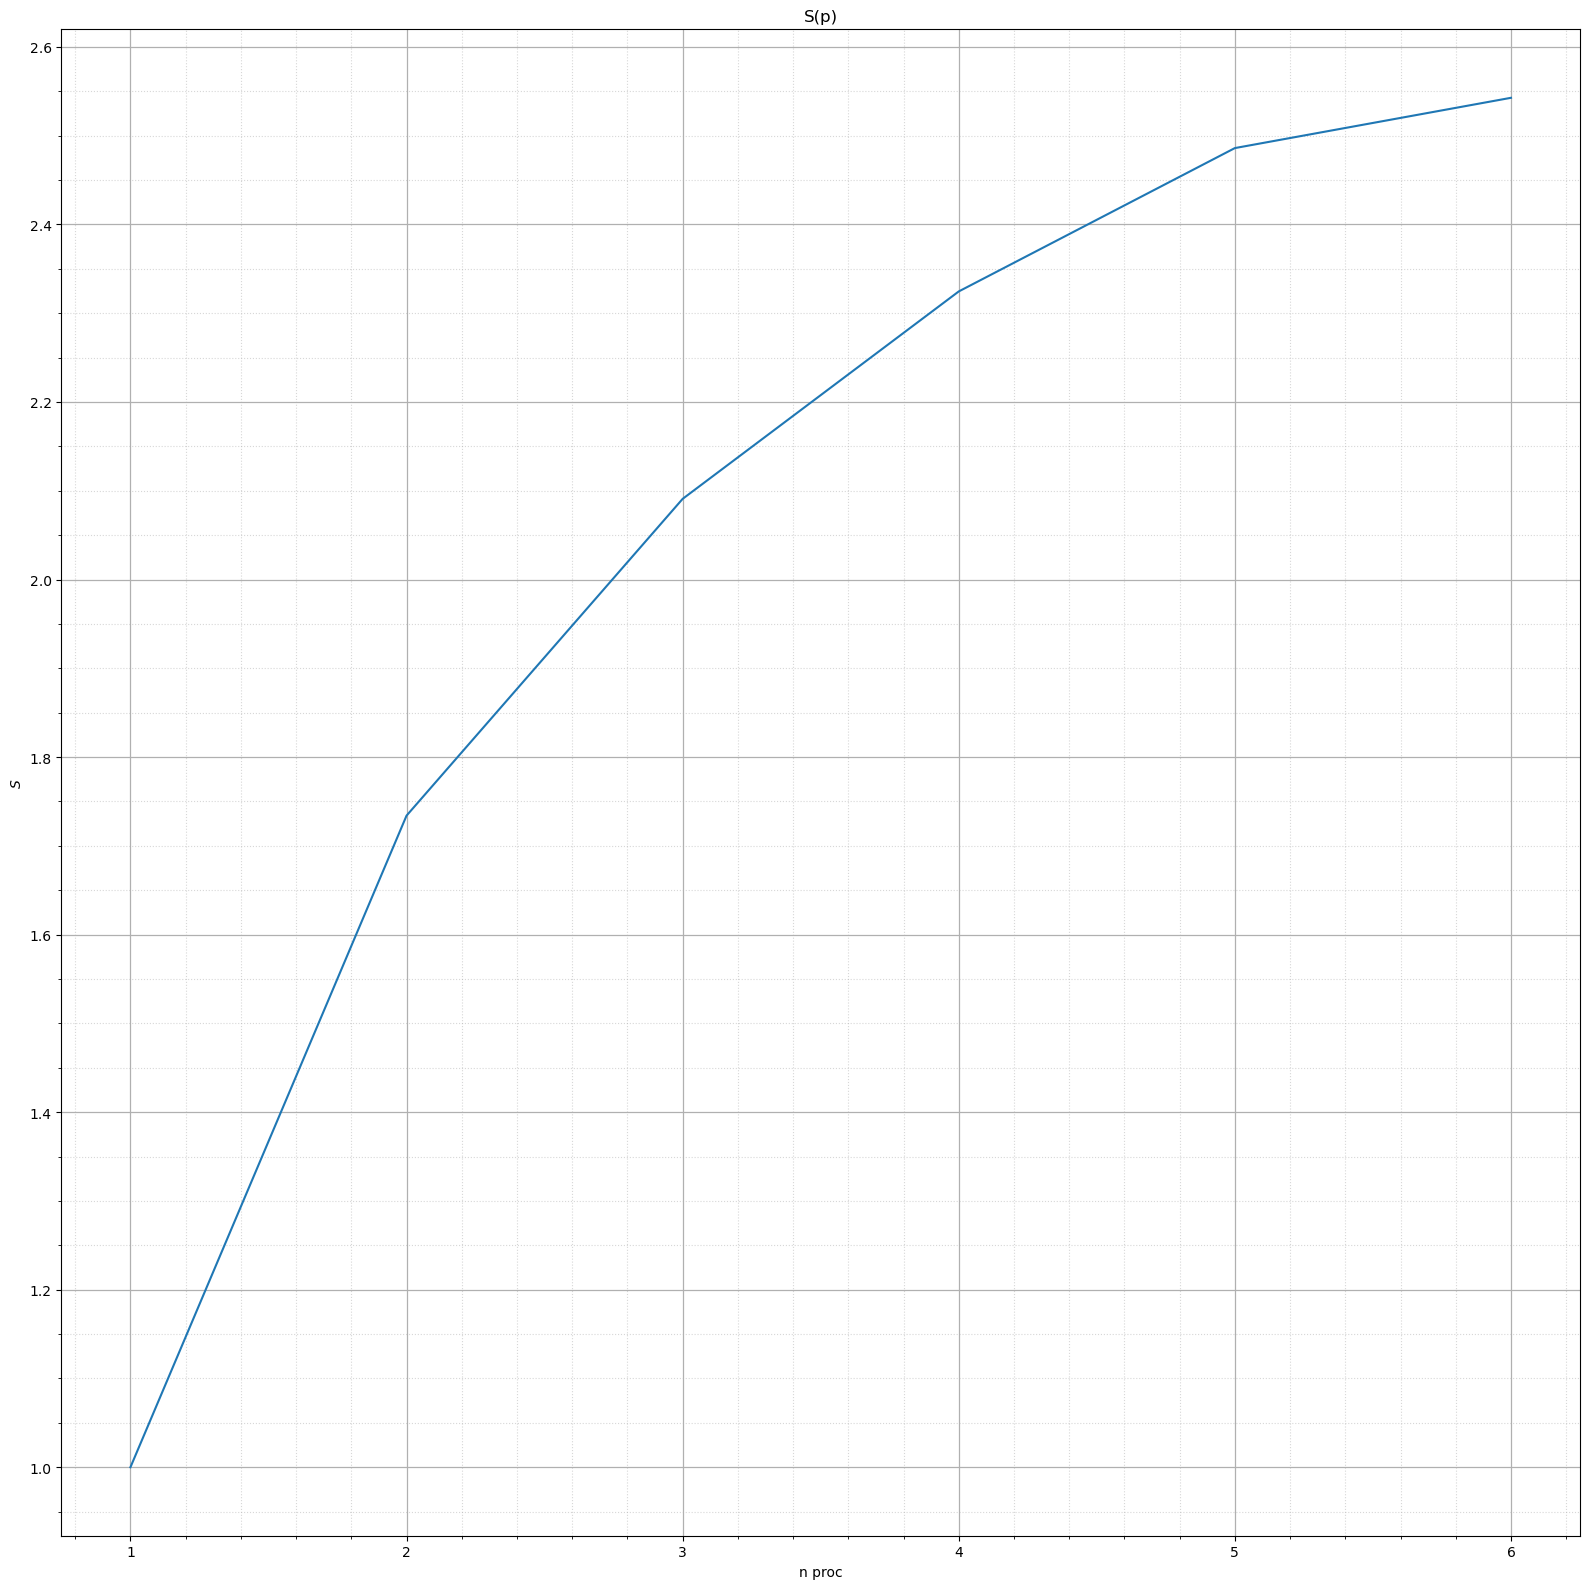

In [24]:
executable = '../../build/lab_mpi_0'
log_dir    = './'

max_proc = 6
n_tests  = 4

os.system("pwd")

log = os.path.join(log_dir, 'mpi_0.txt')

y = []

for i in range(1, max_proc + 1):

    data = 0

    for j in range(n_tests):

        command = "mpirun -np " + str(i) + " " + executable + " > " + log

        print(command)
        os.system(command)

        x = 0
        with open(log) as f:
            for line in f:
                line = line.split()
                time = line[1]
                if x == 0:
                    data += float(time)
                    break
                x += 1

    data /= n_tests
    y.append(data)

plt.figure(figsize = (16, 16), facecolor = "white") # Создаем фигуру
plt.style.use('default')

plt.title(r'S(p)')
plt.ylabel(r'$S$')
plt.xlabel(r"n proc")

x = np.arange(1, max_proc + 1, 1)

for i in range(1, max_proc):
    y[i] = y[0] / y[i]

y[0] = 1

plt.plot(x, y)

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.savefig(os.path.join(log_dir, "output.png"))
plt.show()


/home/panterrich/Documents/ParallelProgramming/tasks/omp_lab_1
mpirun -np 1 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 1 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 1 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 1 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 2 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 2 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 2 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 2 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 3 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 3 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 3 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 3 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 4 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 4 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 4 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 4 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 5 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 5 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun -np 5 ../../build/lab_mpi_1 > ./mpi_1.txt
mpirun

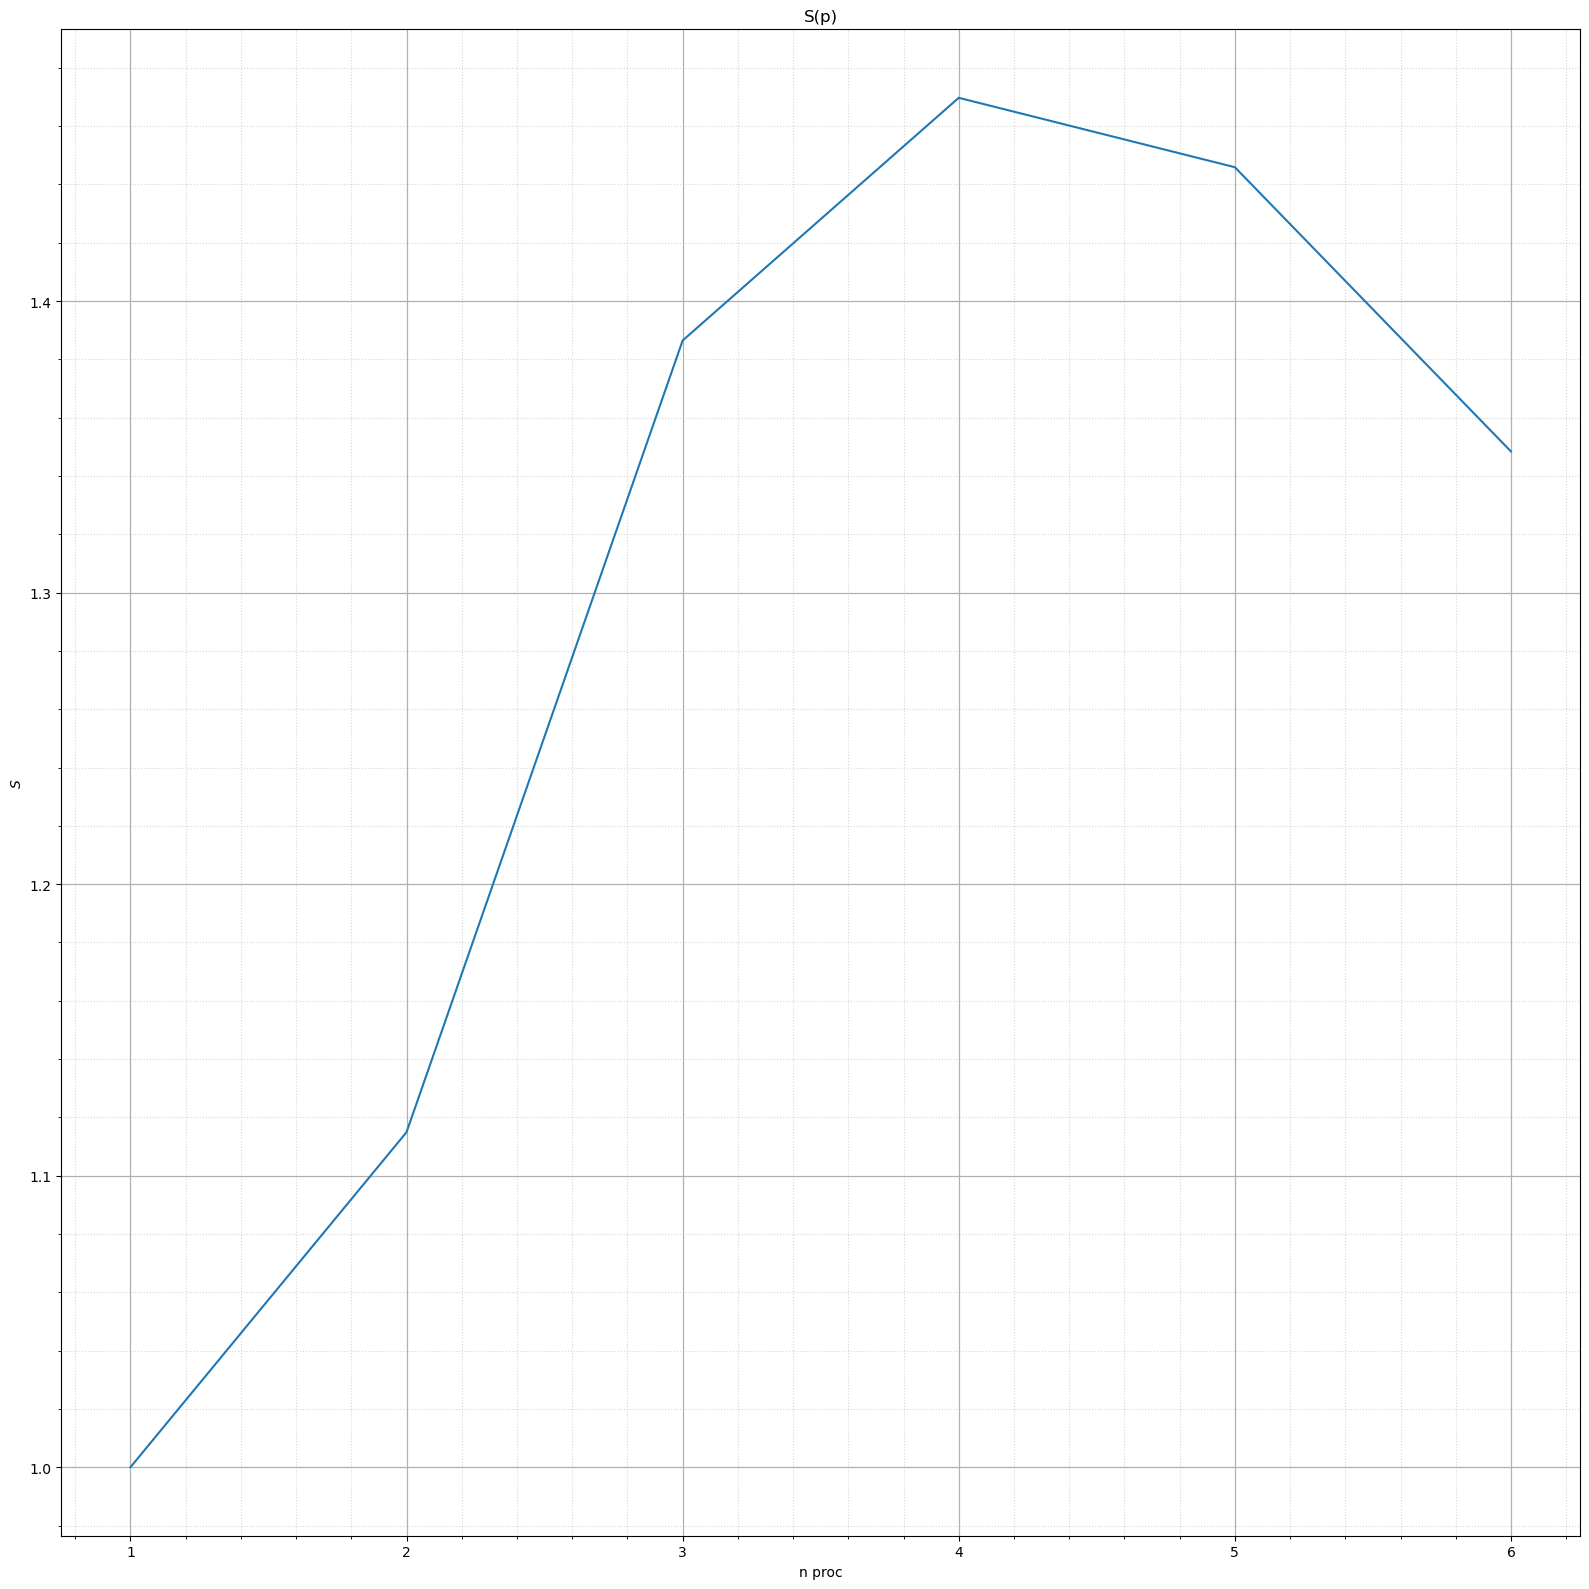

In [25]:
executable = '../../build/lab_mpi_1'
log_dir    = './'

max_proc = 6
n_tests  = 4

os.system("pwd")

log = os.path.join(log_dir, 'mpi_1.txt')

y = []

for i in range(1, max_proc + 1):

    data = 0

    for j in range(n_tests):

        command = "mpirun -np " + str(i) + " " + executable + " > " + log

        print(command)
        os.system(command)

        x = 0
        with open(log) as f:
            for line in f:
                line = line.split()
                time = line[1]
                if x == 0:
                    data += float(time)
                    break
                x += 1

    data /= n_tests
    y.append(data)

plt.figure(figsize = (16, 16), facecolor = "white") # Создаем фигуру
plt.style.use('default')

plt.title(r'S(p)')
plt.ylabel(r'$S$')
plt.xlabel(r"n proc")

x = np.arange(1, max_proc + 1, 1)

for i in range(1, max_proc):
    y[i] = y[0] / y[i]

y[0] = 1

plt.plot(x, y)

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.savefig(os.path.join(log_dir, "output.png"))
plt.show()


/home/panterrich/Documents/ParallelProgramming/tasks/omp_lab_1
mpirun -np 1 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 1 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 1 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 1 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 2 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 2 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 2 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 2 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 3 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 3 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 3 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 3 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 4 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 4 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 4 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 4 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 5 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 5 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun -np 5 ../../build/lab_mpi_3 > ./mpi_3.txt
mpirun

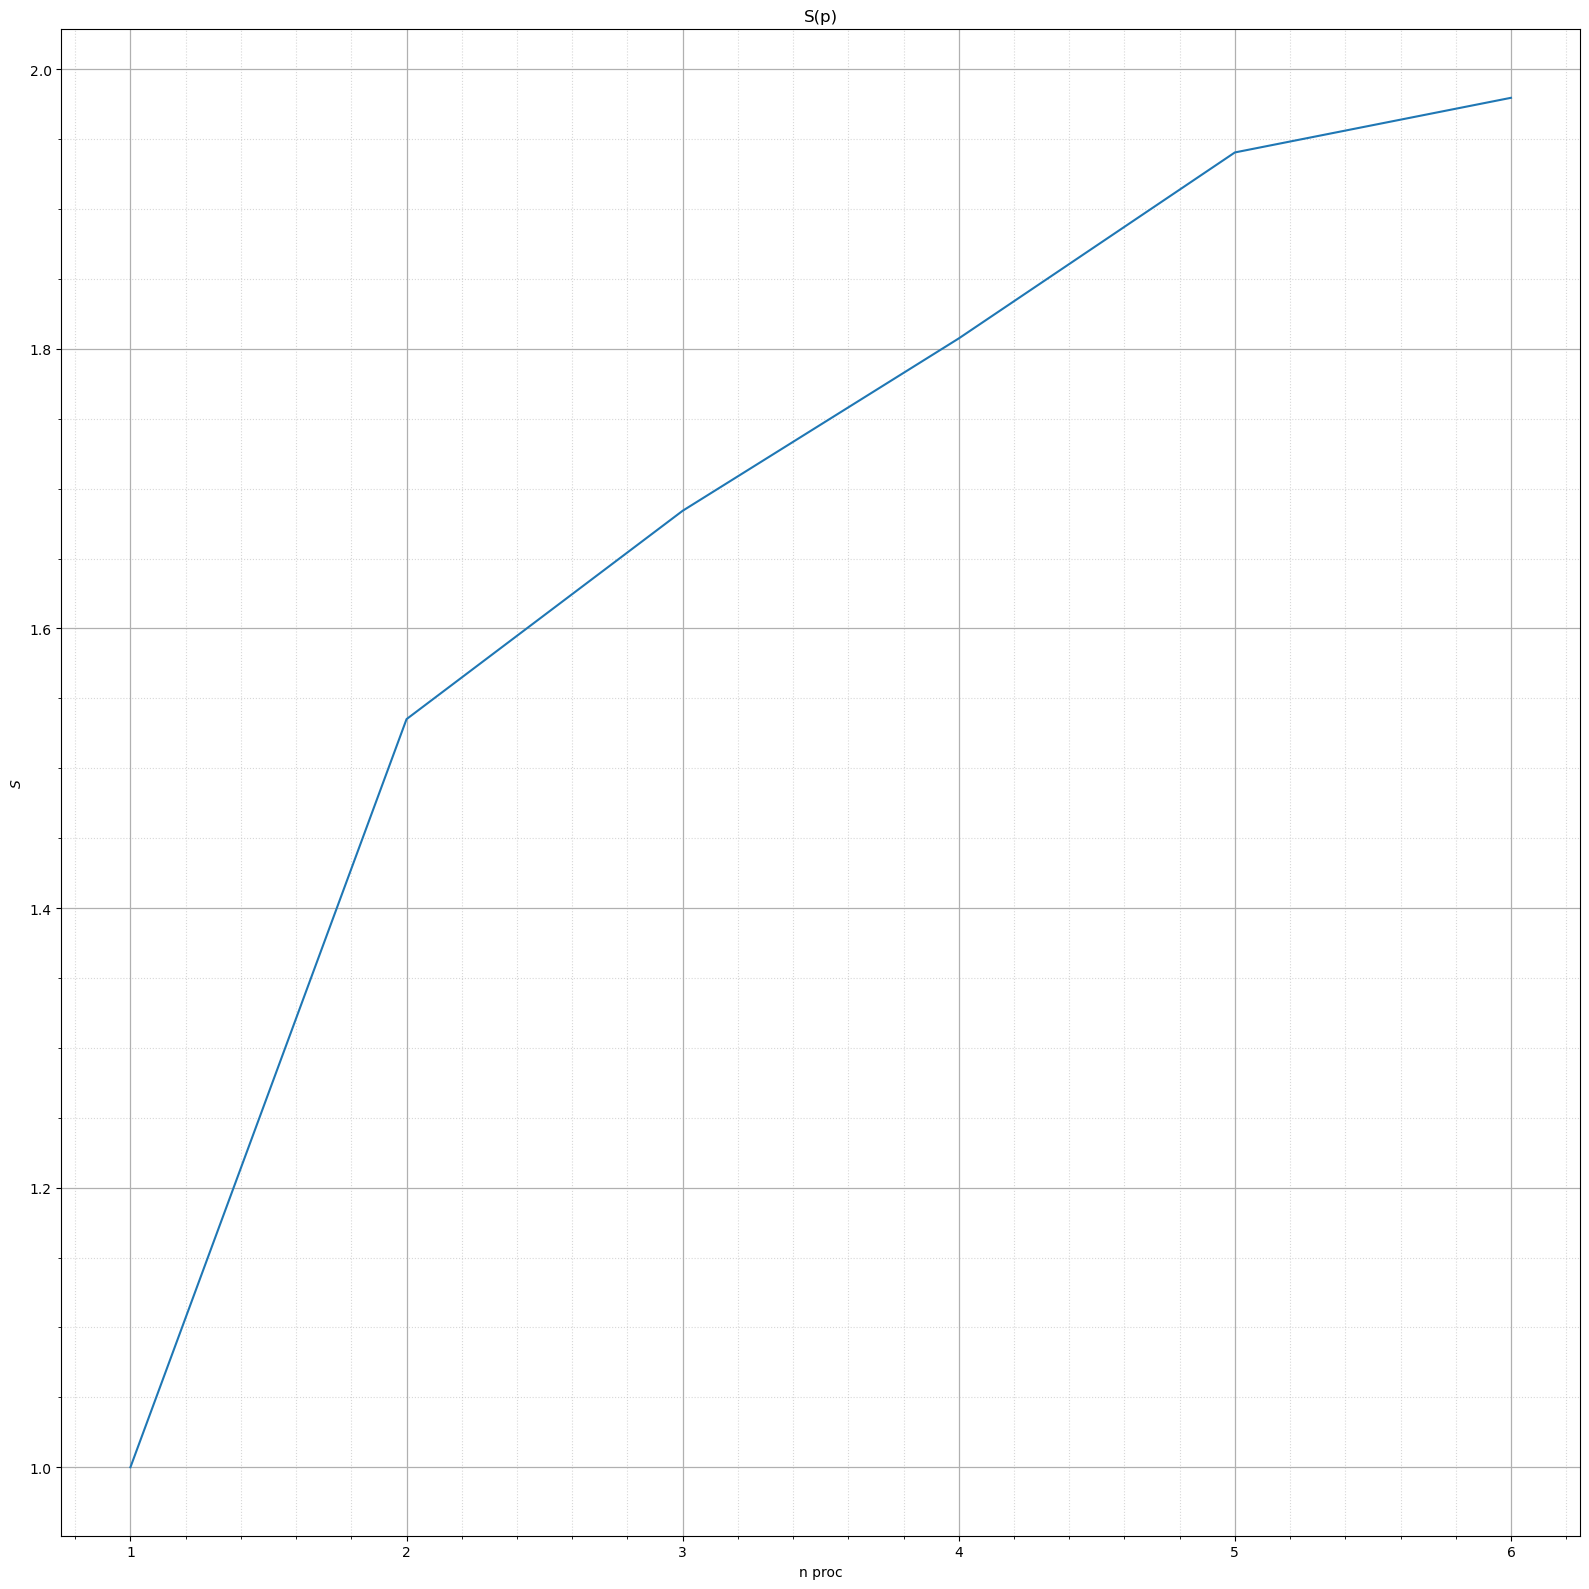

In [3]:
executable = '../../build/lab_mpi_3'
log_dir    = './'

max_proc = 6
n_tests  = 4

os.system("pwd")

log = os.path.join(log_dir, 'mpi_3.txt')

y = []

for i in range(1, max_proc + 1):

    data = 0

    for j in range(n_tests):

        command = "mpirun -np " + str(i) + " " + executable + " > " + log

        print(command)
        os.system(command)

        x = 0
        with open(log) as f:
            for line in f:
                line = line.split()
                time = line[1]
                if x == 0:
                    data += float(time)
                    break
                x += 1

    data /= n_tests
    y.append(data)

plt.figure(figsize = (16, 16), facecolor = "white") # Создаем фигуру
plt.style.use('default')

plt.title(r'S(p)')
plt.ylabel(r'$S$')
plt.xlabel(r"n proc")

x = np.arange(1, max_proc + 1, 1)

for i in range(1, max_proc):
    y[i] = y[0] / y[i]

y[0] = 1

plt.plot(x, y)

plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

plt.minorticks_on()
plt.tight_layout()
plt.savefig(os.path.join(log_dir, "output.png"))
plt.show()
